**Did you use a language model?** (If yes: Tell me the prompt that worked the best, and the prompt that worked the worst)

No.

**What did you do to verify that your code worked as expected, whether you used a language model or not?**

To validate the functionality of my code, I routinely inspected variable values by including print statements, ensuring they corresponded to my expected values. I did not utilize a language model for code correctness verification.

**Comments explaining your logic in each code block**

# Chapter 3: The Pandas essentials for data visualization

In [1]:
# import pandas module
import pandas as pd

## Get the data

In [2]:
# get data from a pickle form
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [3]:
# get data from a pickle form
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Long vs. wide data

<Axes: xlabel='Year', ylabel='DeathRate'>

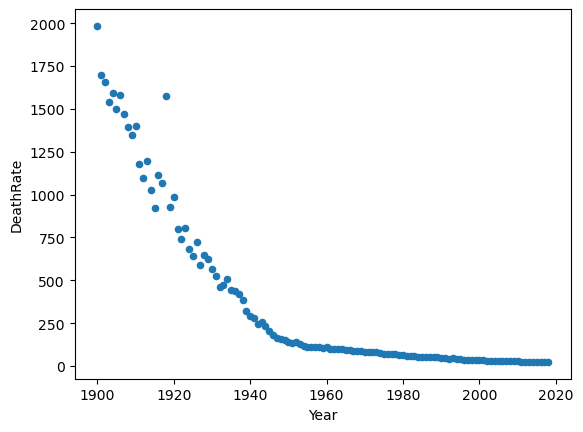

In [4]:
# plot a scatter chart with a condition and specifying x, y
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', 
                                                               y='DeathRate')

<Axes: xlabel='Year'>

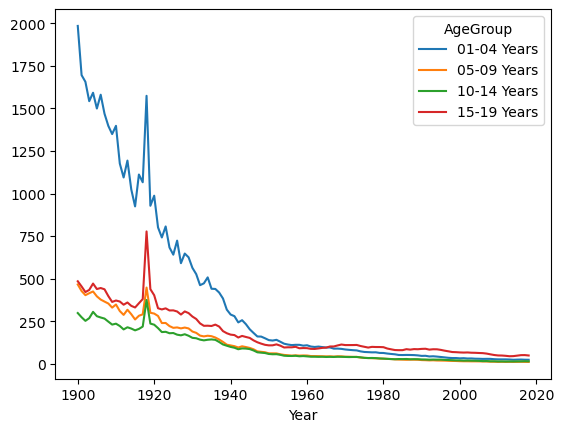

In [5]:
# plot a line chart without specifying anything
mortality_wide.plot()

## Plot the data

<Axes: >

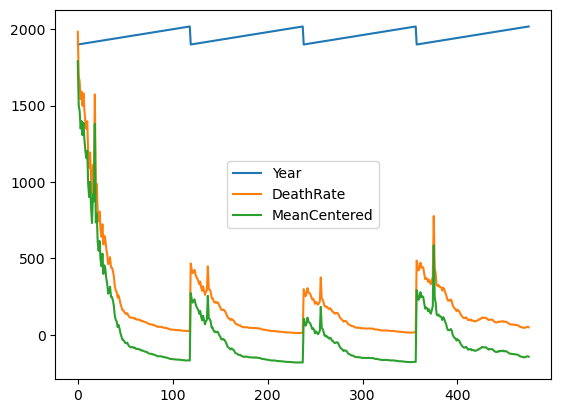

In [6]:
# plot a line chart without specifying anything
mortality_data.plot()

<Axes: xlabel='Year'>

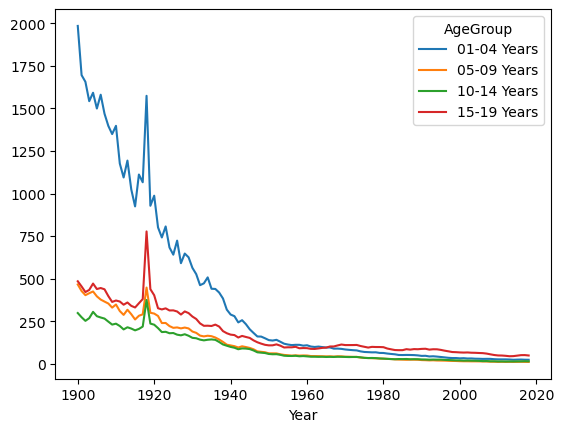

In [7]:
# plot a line chart without specifying anything
mortality_wide.plot()

## Parameters

<Axes: xlabel='Year', ylabel='DeathRate'>

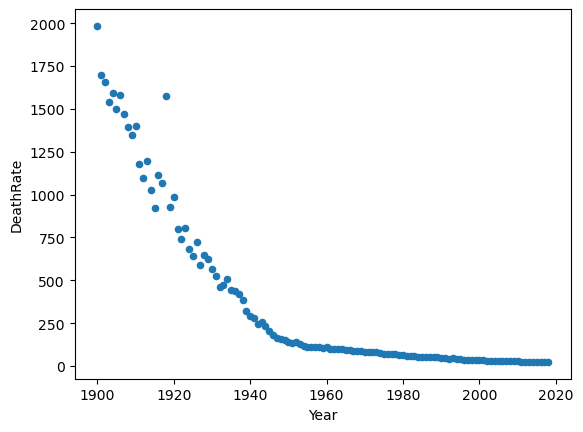

In [8]:
# plot a scatter chart with a condition and specifying x, y
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', 
                                                               y='DeathRate')

<Axes: xlabel='Year'>

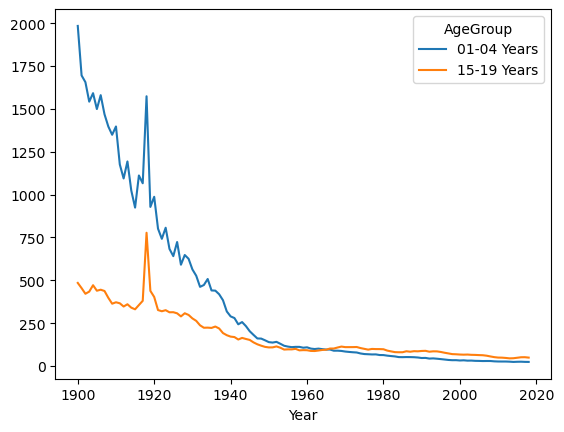

In [9]:
# plot a line chart inputing a column list into y parameter
mortality_wide.plot.line(y=['01-04 Years','15-19 Years'])
# mortality_wide.plot(y=['01-04 Years','15-19 Years'])

## Line and area plots

<Axes: xlabel='Year'>

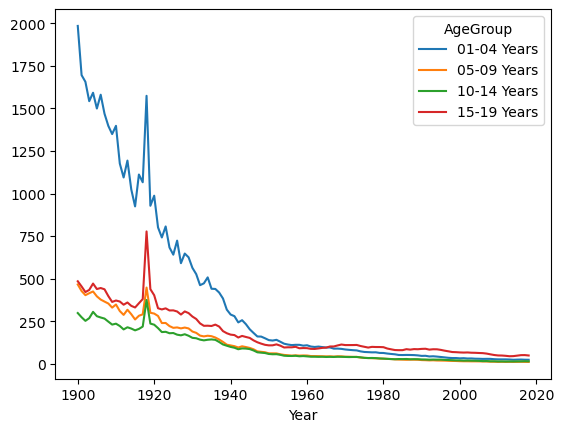

In [10]:
# plot a line chart without specifying anything
mortality_wide.plot()

**3. Use the wide data to create a line plot for just the data in the 15-19 age group. Include an appropriate title on the plot and remove the legend.**

<Axes: title={'center': 'DeathRate of 15-19 Years Age Group'}, xlabel='Year'>

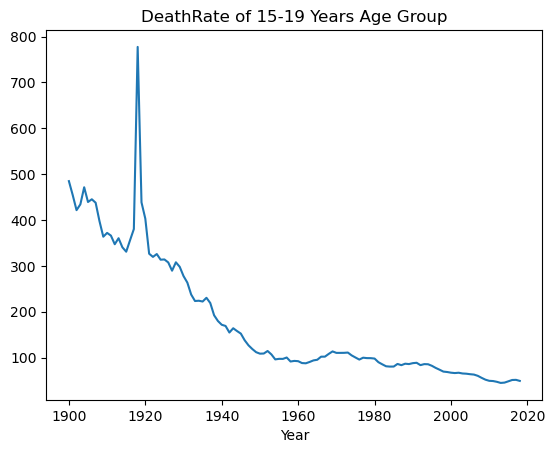

In [11]:
mortality_wide['15-19 Years'].plot(title = 'DeathRate of 15-19 Years Age Group',
                                  legend = False)

<Axes: xlabel='Year'>

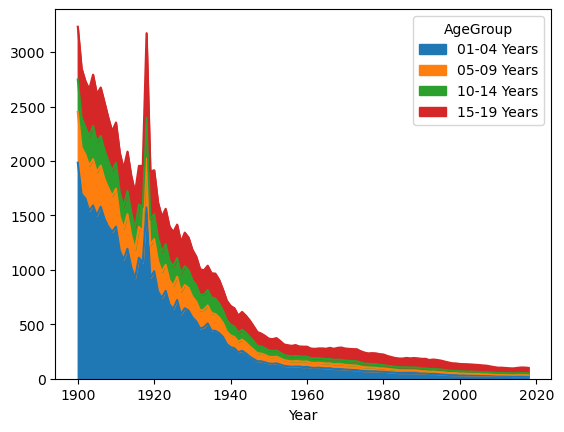

In [12]:
# plot an area chart without specifying anything
mortality_wide.plot.area()

**4. Use the wide data to create an area plot for all age groups, and reverse the order of the items in the legend to see how that looks.**

<Axes: xlabel='Year'>

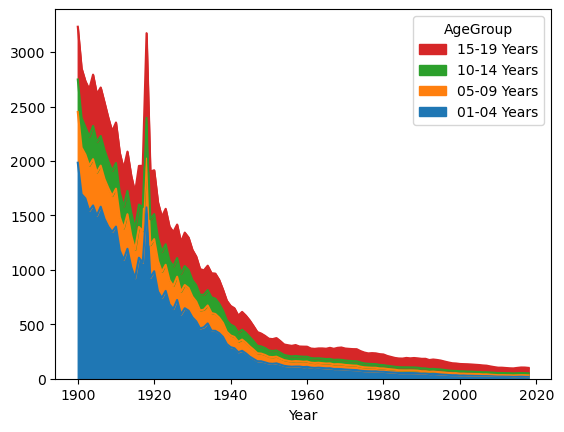

In [13]:
mortality_wide.plot.area(legend = 'reverse')

## Scatter plots

<Axes: xlabel='Year', ylabel='DeathRate'>

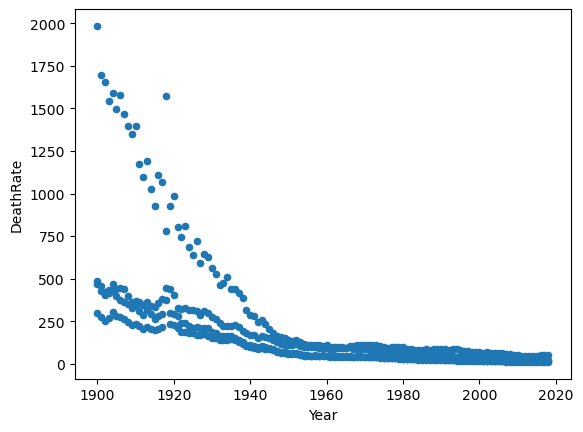

In [14]:
mortality_data.plot.scatter(x='Year', y='DeathRate')

In [15]:
# mortality_data.plot.scatter()   # Error: must have x and y parameters
# TypeError: PlotAccessor.scatter() missing 2 required positional arguments: 'x' and 'y'

In [16]:
# mortality_wide.plot.scatter(x='Year',y='Death_Rate') # Error: 'Year' is in an index
# KeyError: 'Year'

C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: xlabel='Year', ylabel='DeathRate'>

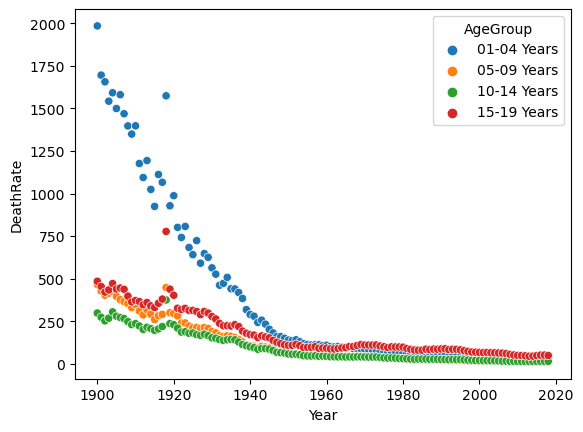

In [17]:
import seaborn as sns
sns.scatterplot(data = mortality_data, x='Year', y='DeathRate', hue='AgeGroup')

## Bar plots

<Axes: xlabel='Year'>

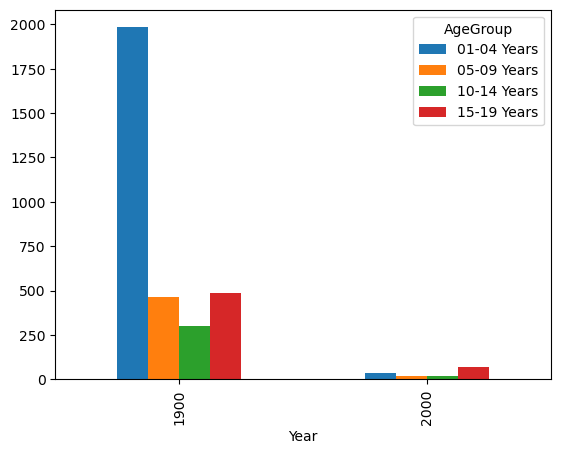

In [18]:
# plot a bar chart using query to filter Year with 2 values
mortality_wide.query('Year in (1900, 2000)').plot.bar()

**5. Use the wide data to create a bar plot for all age groups that shows the mortality rates for just the year 1900, and note the values on the y-axis.**

<Axes: xlabel='Year', ylabel='DeathRate'>

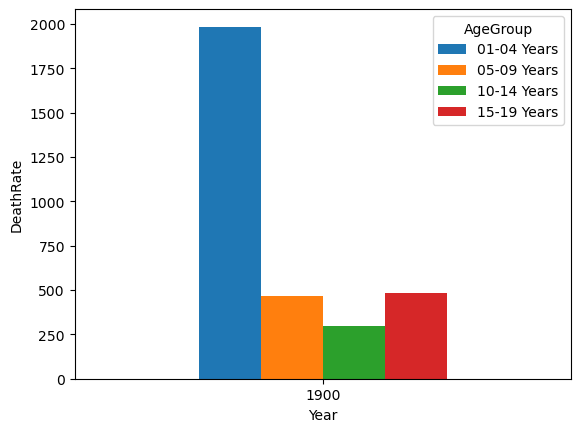

In [19]:
mortality_wide.query('Year == 1900').plot.bar(ylabel = 'DeathRate', rot = 360)
# ax = mortality_wide.query('Year == 1900').plot.bar(ylabel = 'DeathRate',
#                                                   rot = 360)

# for container in ax.containers:
#     ax.bar_label(container)

**6. Change the bar plot you created in step 5 to show the mortality rates for the year 2000, and note how the values on the y-axis change. Then, add an appropriate title to the plot and remove the label for the x-axis.**

<Axes: title={'center': 'DeathRate of 2000 Year'}, ylabel='DeathRate'>

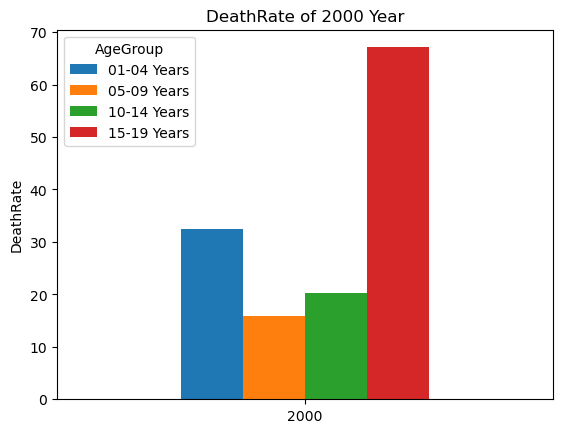

In [20]:
# columns into different bars with different colors
mortality_wide.query('Year == 2000').plot.bar(ylabel = 'DeathRate',
                                              rot = 360,
                                              title = 'DeathRate of 2000 Year',
                                              xlabel = '')
# ax = mortality_wide.query('Year == 2000').plot.bar(title = 'DeathRate of 2000 Year',
#                                              xlabel = '', rot = 360)
# ax.set_xticks([])

**7. Use the long data to create a bar plot like the one in step 6. To do that, you’ll need to chain the pivot() method to the query() method. Compare the two bar charts, and then make improvements so the plot that uses the long data is easier to read.**

<Axes: title={'center': 'DeathRate of 2000 Year'}, ylabel='DeathRate'>

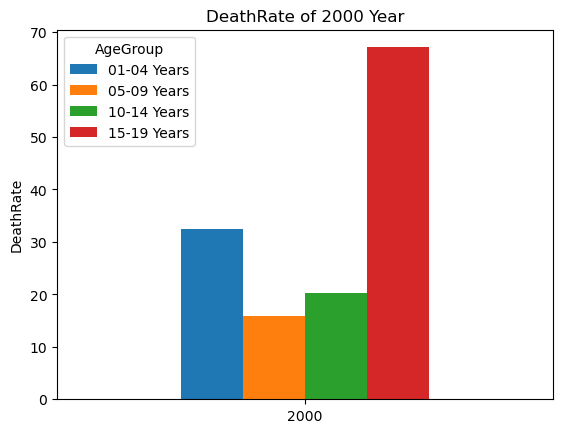

In [21]:
# turn long data to wide one
mortality_data.query('Year == 2000').pivot(index='Year', columns='AgeGroup', 
                                           values='DeathRate').plot.bar(ylabel = 'DeathRate',
                                              rot = 360,
                                              title = 'DeathRate of 2000 Year',
                                              xlabel = '')
# mortality_data.query('Year == 2000').plot.bar(x = 'Year', y= 'DeathRate')

<Axes: ylabel='Year'>

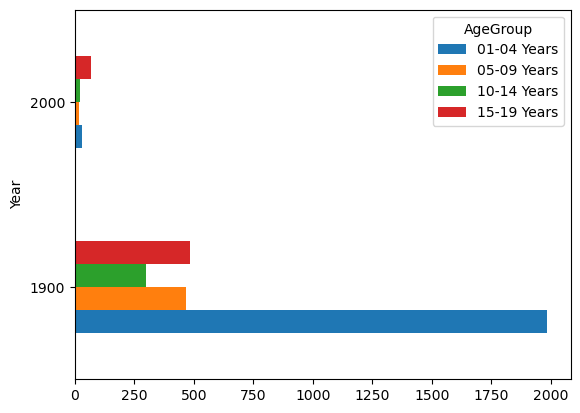

In [22]:
# plot a horizontal bar chart using query to filter Year with 2 values
mortality_wide.query('Year in (1900,2000)').plot.barh()

## Histogram and density plots

<Axes: ylabel='Frequency'>

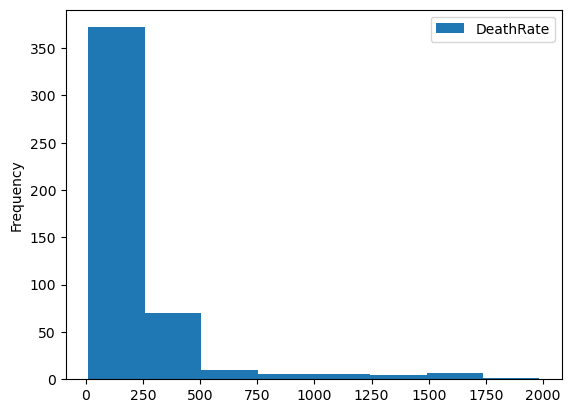

In [23]:
# plot a histogram of a column and specifying bin number
# mortality_data.query('DeathRate <= 0').count()
# mortality_data.plot.hist(column = 'DeathRate', bins=8)
mortality_data.plot.hist(y = 'DeathRate', bins=8)

**8. Use the long data to create a histogram that shows the frequency of the death rates in the default number of bins. Then, change the number of bins to 15 to see how this changes the histogram. Does this make it easier to determine the frequency at various datapoints?**

Yes, this modification provides a more detailed view of the distribution of DeathRate, particularly within the 0-500 range, resulting in a smoother representation of the data.

<Axes: ylabel='Frequency'>

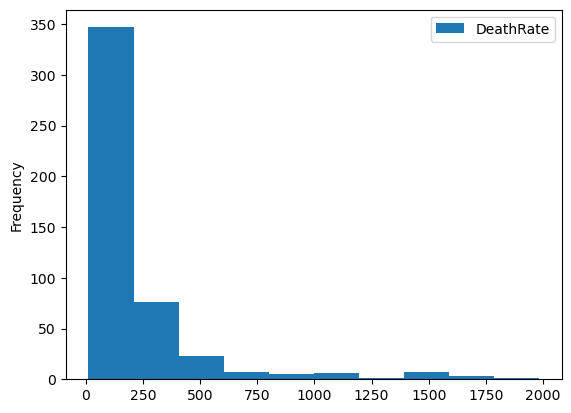

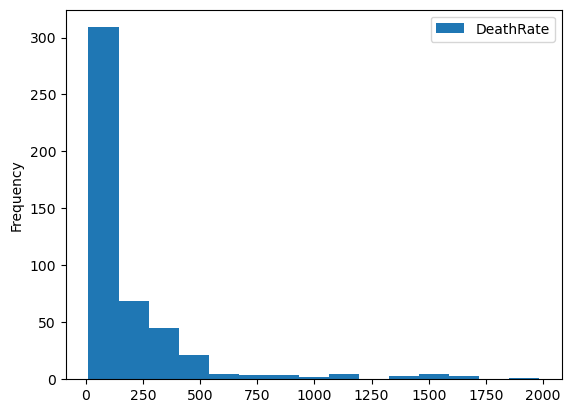

In [24]:
mortality_data.plot.hist(y = 'DeathRate') # default 10
mortality_data.plot.hist(y = 'DeathRate', bins=15)
# mortality_data.count() # 476

<Axes: ylabel='Density'>

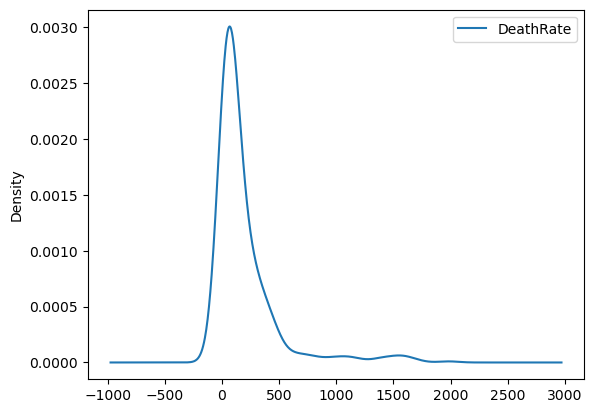

In [25]:
# plot a density chart of a column
mortality_data.plot.density(y='DeathRate')

**9. Use the long data to create a density plot that shows the distribution of the death rates in the year 1900. Include a title and grids in the plot to make the data easier to read.**

<Axes: title={'center': 'DeathRate of Year 1900'}, ylabel='Density'>

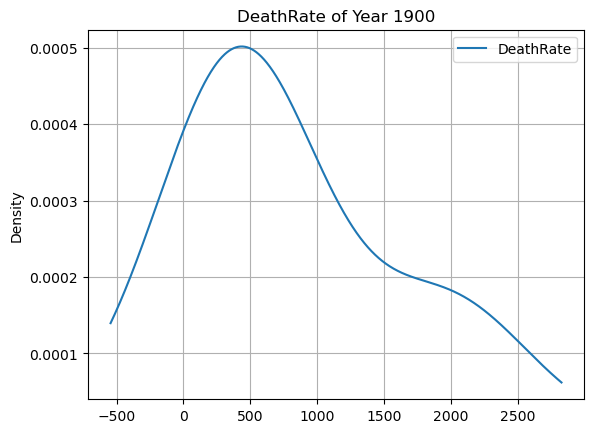

In [26]:
mortality_data.query('Year == 1900').plot.density(y = 'DeathRate',
                                                 title = 'DeathRate of Year 1900',
                                                 grid = True)

<Axes: ylabel='Density'>

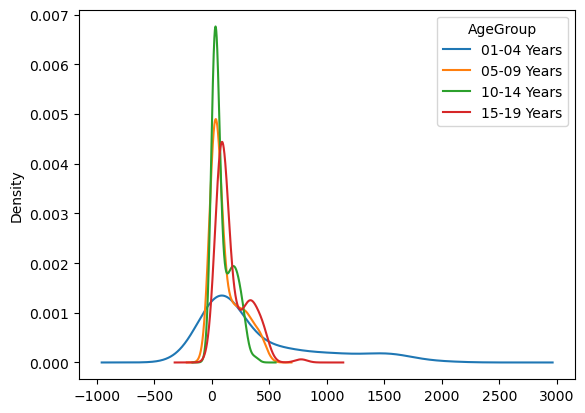

In [27]:
# plot a density chart based on the values of different columns
mortality_wide.plot.density()

## Box and pie plots

<Axes: >

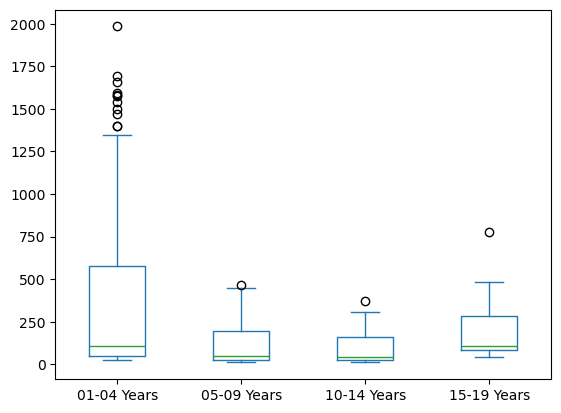

In [28]:
# plot a box plot showing statistics of columns
mortality_wide.plot.box()

<Axes: ylabel='DeathRate'>

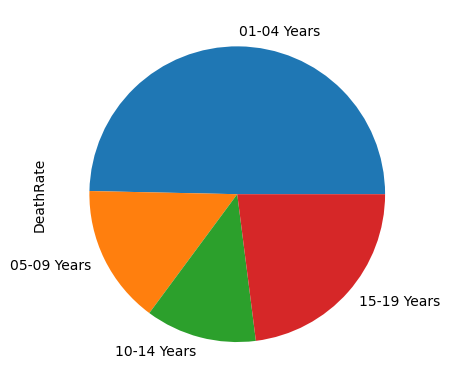

In [29]:
mortality_data.groupby('AgeGroup')['DeathRate'].sum().plot.pie()

**10. Use the long data to create a pie plot that shows the sum of the death rates for the years 1900, 1925, 1950, 1975, and 2000.**

<Axes: ylabel='DeathRate'>

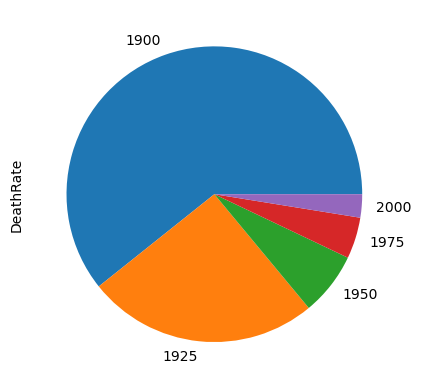

In [30]:
mortality_data.query('Year in (1900, 1925, 1950, 1975, 2000)').groupby('Year')['DeathRate'].sum().plot.pie()

## Improve the appearance

<Axes: title={'center': 'Child Mortality: 1900-2018'}, xlabel='Year', ylabel='Deaths per 100,000'>

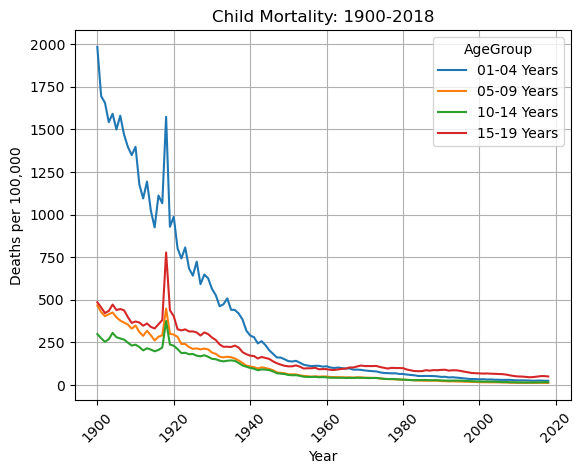

In [31]:
# plot a line chart specifying title, ylabel, grid, and rotation
mortality_wide.plot.line(title='Child Mortality: 1900-2018',
                         ylabel='Deaths per 100,000', grid=True, rot=45)

<Axes: title={'center': 'Child Mortality: 2000-2018'}, xlabel='Year', ylabel='Deaths per 100,000'>

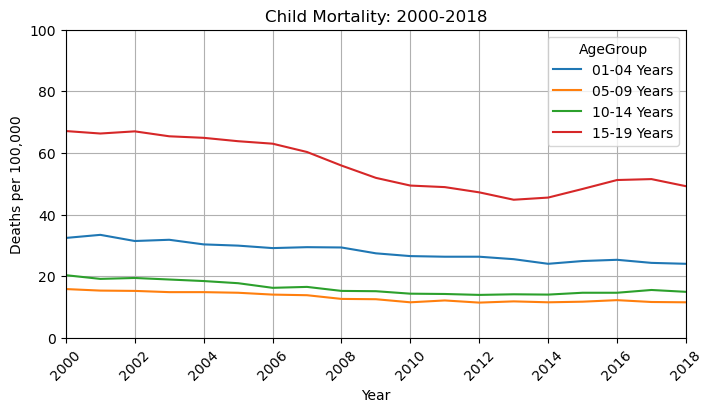

In [32]:
# plot a line chart specifying title, ylabel, figsize, grid, rotation, xlim and ylim
mortality_wide.plot.line(title='Child Mortality: 2000-2018',
     ylabel='Deaths per 100,000', figsize=(8,4), grid=True, rot=45,
     xlim=(2000,2018), ylim=(0,100))

## Subplots

array([[<Axes: title={'center': 'Child Mortality: 01-04'}, xlabel='Year', ylabel='Deaths per 100,000'>,
        <Axes: title={'center': 'Child Mortality: 05-09'}, xlabel='Year', ylabel='Deaths per 100,000'>],
       [<Axes: title={'center': 'Child Mortality: 10-14'}, xlabel='Year', ylabel='Deaths per 100,000'>,
        <Axes: title={'center': 'Child Mortality: 15-19'}, xlabel='Year', ylabel='Deaths per 100,000'>]],
      dtype=object)

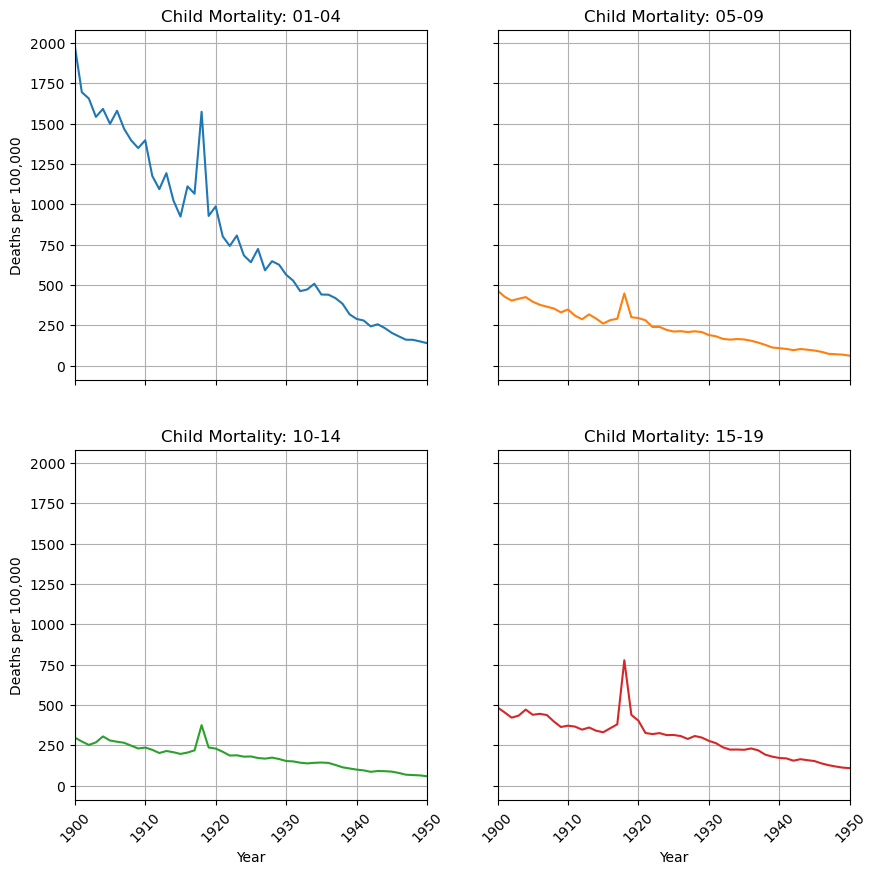

In [33]:
# subplot many line chart with different columns
# specifying title, ylabel, sharey, grid, rotation, xlim, legend, to plot sublots, layout and figsize
mortality_wide.plot.line(
    title=['Child Mortality: 01-04','Child Mortality: 05-09',
           'Child Mortality: 10-14','Child Mortality: 15-19'],
    ylabel='Deaths per 100,000', sharey=True,
    grid=True, rot=45, xlim=(1900,1950), legend=False,
    subplots=True, layout=(2,2), figsize=(10,10))

## Chaining

<Axes: ylabel='AgeGroup'>

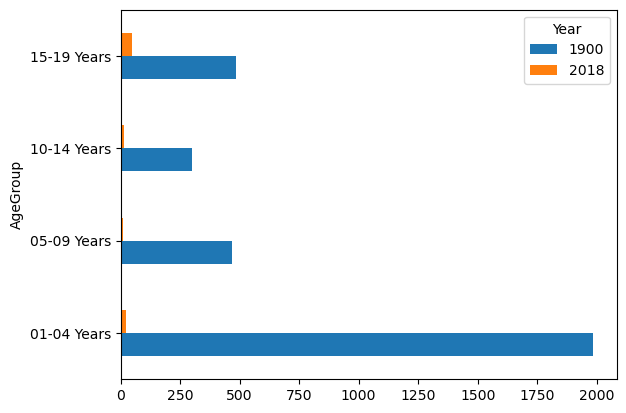

In [34]:
# get subset by query, pivot subset, and then plot a horizontal bar chart
mortality_data.query('Year in (1900,2018)') \
     .pivot(index='AgeGroup', columns='Year', values='DeathRate') \
     .plot.barh()

**11. Create a plot with four subplots in two rows and two columns. The subplots should be horizontal bar charts that show the child mortality rates for each age group for the years 1900, 1925, 1950, 1975, and 2000. Format the subplots so they’re easy to read.**

array([[<Axes: title={'center': 'Child Mortality: 01-04'}, xlabel='Deaths per 100,000', ylabel='Year'>,
        <Axes: title={'center': 'Child Mortality: 05-09'}, xlabel='Deaths per 100,000', ylabel='Year'>],
       [<Axes: title={'center': 'Child Mortality: 10-14'}, xlabel='Deaths per 100,000', ylabel='Year'>,
        <Axes: title={'center': 'Child Mortality: 15-19'}, xlabel='Deaths per 100,000', ylabel='Year'>]],
      dtype=object)

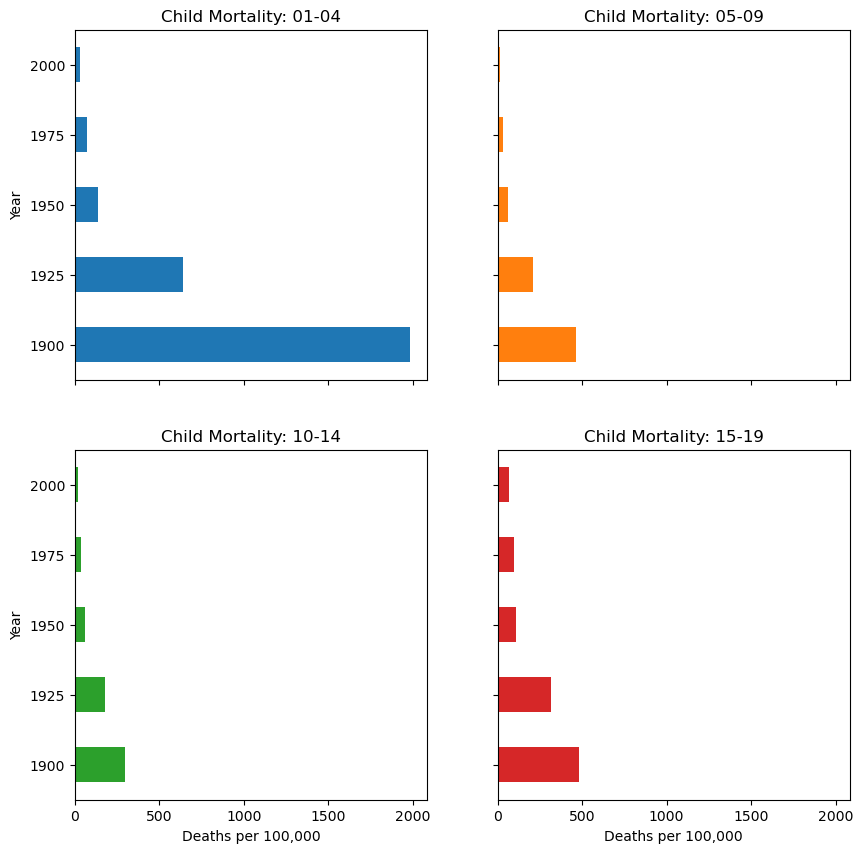

In [35]:
mortality_data.query('Year in (1900, 1925, 1950, 1975, 2000)')\
        [['Year','AgeGroup', 'DeathRate']]\
        .pivot(index='Year', columns = 'AgeGroup', values = 'DeathRate')\
        .plot.barh(title=['Child Mortality: 01-04','Child Mortality: 05-09',
           'Child Mortality: 10-14','Child Mortality: 15-19'],
            ylabel='Year', xlabel='Deaths per 100,000', 
            sharey=True, legend=False, 
            subplots=True, layout=(2,2), figsize=(10,10))

<Axes: xlabel='Year', ylabel='Deaths per 100,000'>

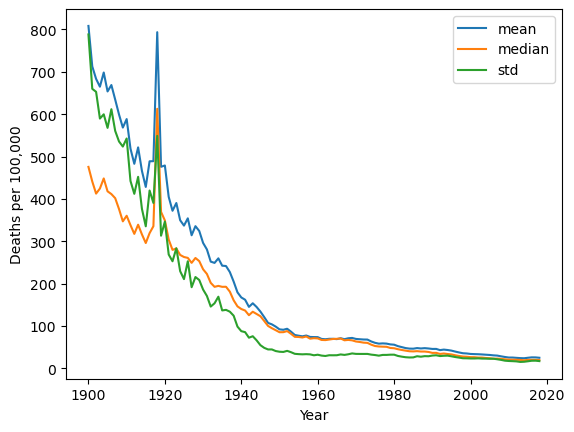

In [36]:
mortality_data.groupby('Year')['DeathRate'].agg(['mean','median','std'])\
    .plot(ylabel = 'Deaths per 100,000')

<Axes: xlabel='Year'>

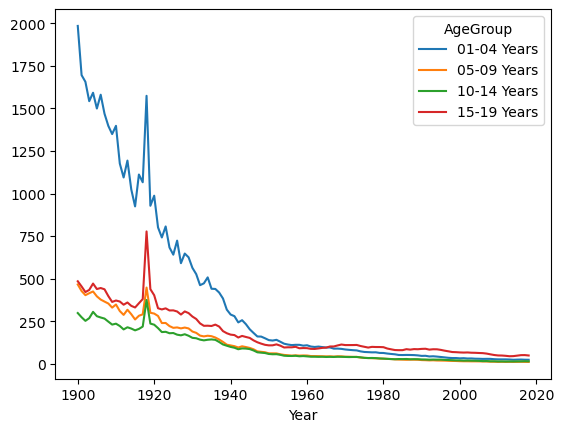

In [37]:
mortality_wide.plot.line()

<Axes: xlabel='Year', ylabel='DeathRate'>

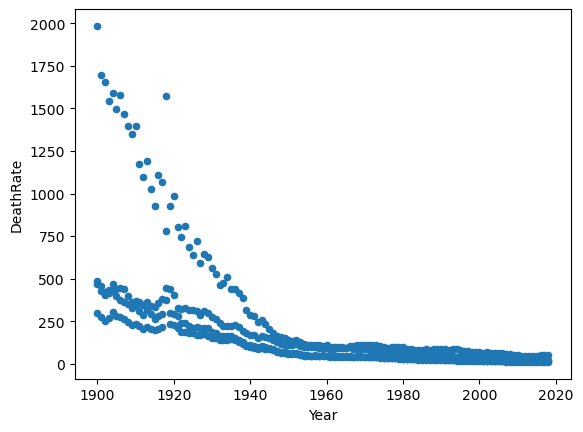

In [39]:
mortality_data.plot.scatter(x='Year', y='DeathRate')

array([[<Axes: xlabel='Year'>, <Axes: xlabel='Year'>],
       [<Axes: xlabel='Year'>, <Axes: xlabel='Year'>]], dtype=object)

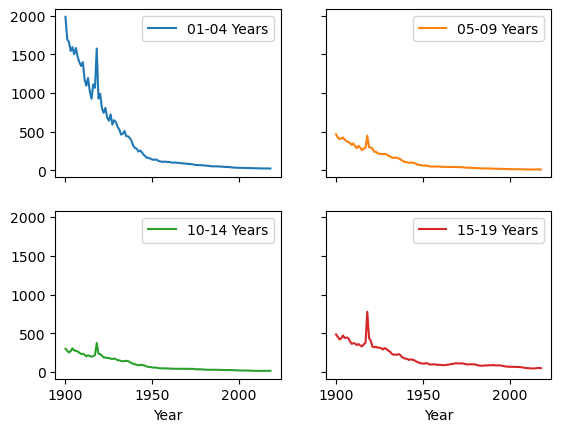

In [40]:
mortality_wide.plot.line(sharey=True, subplots=True, layout=(2,2))

<Axes: ylabel='Year'>

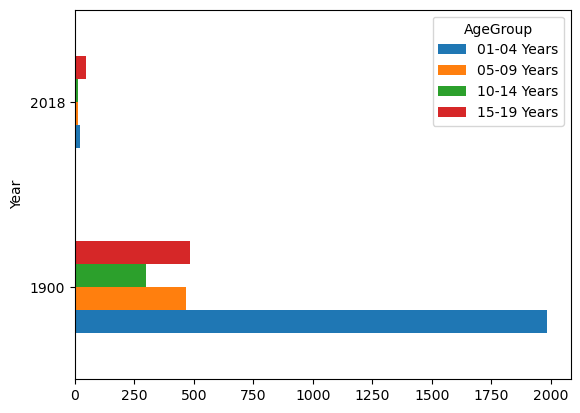

In [41]:
mortality_wide.query('Year in (1900,2018)').plot.barh()